## 2022 Predict Ideology Score for NFL Teams

In [1]:
from fastai.text.all import *
import transformers
from ideology_utils import *

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
transformers.utils.logging.set_verbosity(40) 

### Download Unlimited Tweets using Unofficial Twitter API

Twitter handles for a selected **NFL Teams** were copied and pasted into a csv `handles_group.csv` file manually from here: https://www.4icu.org/twitter/us/

Used `node index.js handles_group.csv 500`
This should be done in mamba environment containing `npm` and `nodejs`. The program itself is `index.js`. All of this is located in `twitterAPI` and is available from github: https://github.com/colindaniels/twitterAPI

To load these tweeets, reference the directory that then contains `json` files for each member of the group.

In [8]:
group = Path('tweets/tweets-nfl-2022-500')

### Download Tweets using Official Twitter API (faster, but limited to past week and subject to rate limits) 

In [4]:
#group = get_tweets_of_group("handles/handles_nfl.csv", "tweets-nfl")

### Ideology of a Select Group using Transformers Model `blue-or-red-roberta-2022`

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.

In [5]:
trainer,tokz = load_tfms_model()

In [9]:
scores_tfms = scores_of_group_tfms(group, [trainer,tokz])

['AtlantaFalcons', 0.56, 0.55, 500]
['Buccaneers', 0.56, 0.54, 500]
['dallascowboys', 0.88, 0.84, 499]
['Giants', 0.41, 0.43, 498]
['Raiders', 0.45, 0.45, 499]
['ChicagoBears', 0.55, 0.54, 500]
['buffalobills', 0.22, 0.26, 500]
['Saints', 0.71, 0.68, 500]
['Colts', 0.54, 0.53, 500]
['Titans', 0.59, 0.58, 500]
['AZCardinals', 0.49, 0.49, 500]
['Broncos', 0.48, 0.49, 500]
['Chargers', 0.58, 0.54, 498]
['Chiefs', 0.58, 0.57, 500]
['RamsNFL', 0.4, 0.42, 500]
['steelers', 0.57, 0.56, 500]
['HoustonTexans', 0.48, 0.49, 499]
['Bengals', 0.65, 0.6, 500]
['packers', 0.6, 0.57, 500]
['Seahawks', 0.45, 0.44, 500]
['Patriots', 0.45, 0.45, 500]
['Panthers', 0.49, 0.53, 500]
['Jaguars', 0.43, 0.41, 499]
['MiamiDolphins', 0.55, 0.56, 500]
['Lions', 0.54, 0.53, 500]
['Ravens', 0.55, 0.51, 500]
['nyjets', 0.48, 0.48, 499]
['Vikings', 0.47, 0.49, 500]
['Browns', 0.63, 0.6, 499]
['Eagles', 0.71, 0.66, 500]


In [10]:
df = scores2df(scores_tfms,'s1')

### Ideology of NFL Teams using Transformers Model `blue-or-red-roberta-2022`

**scores = {handle: [s1, s2, n], . . .}**, where, **s1** is the mean of the **Conservative** probability of each of the tweets and **s2** is the mean number of tweets scored **Conservative**. The range for each s1, s2 is **[0,1]** such that **0** is 100% **Progressive** and **1** is 100% **Conservative**. **n** is the number of tweets.
**0 is Progressive, 1 is Conservative**

<AxesSubplot:ylabel='handle'>

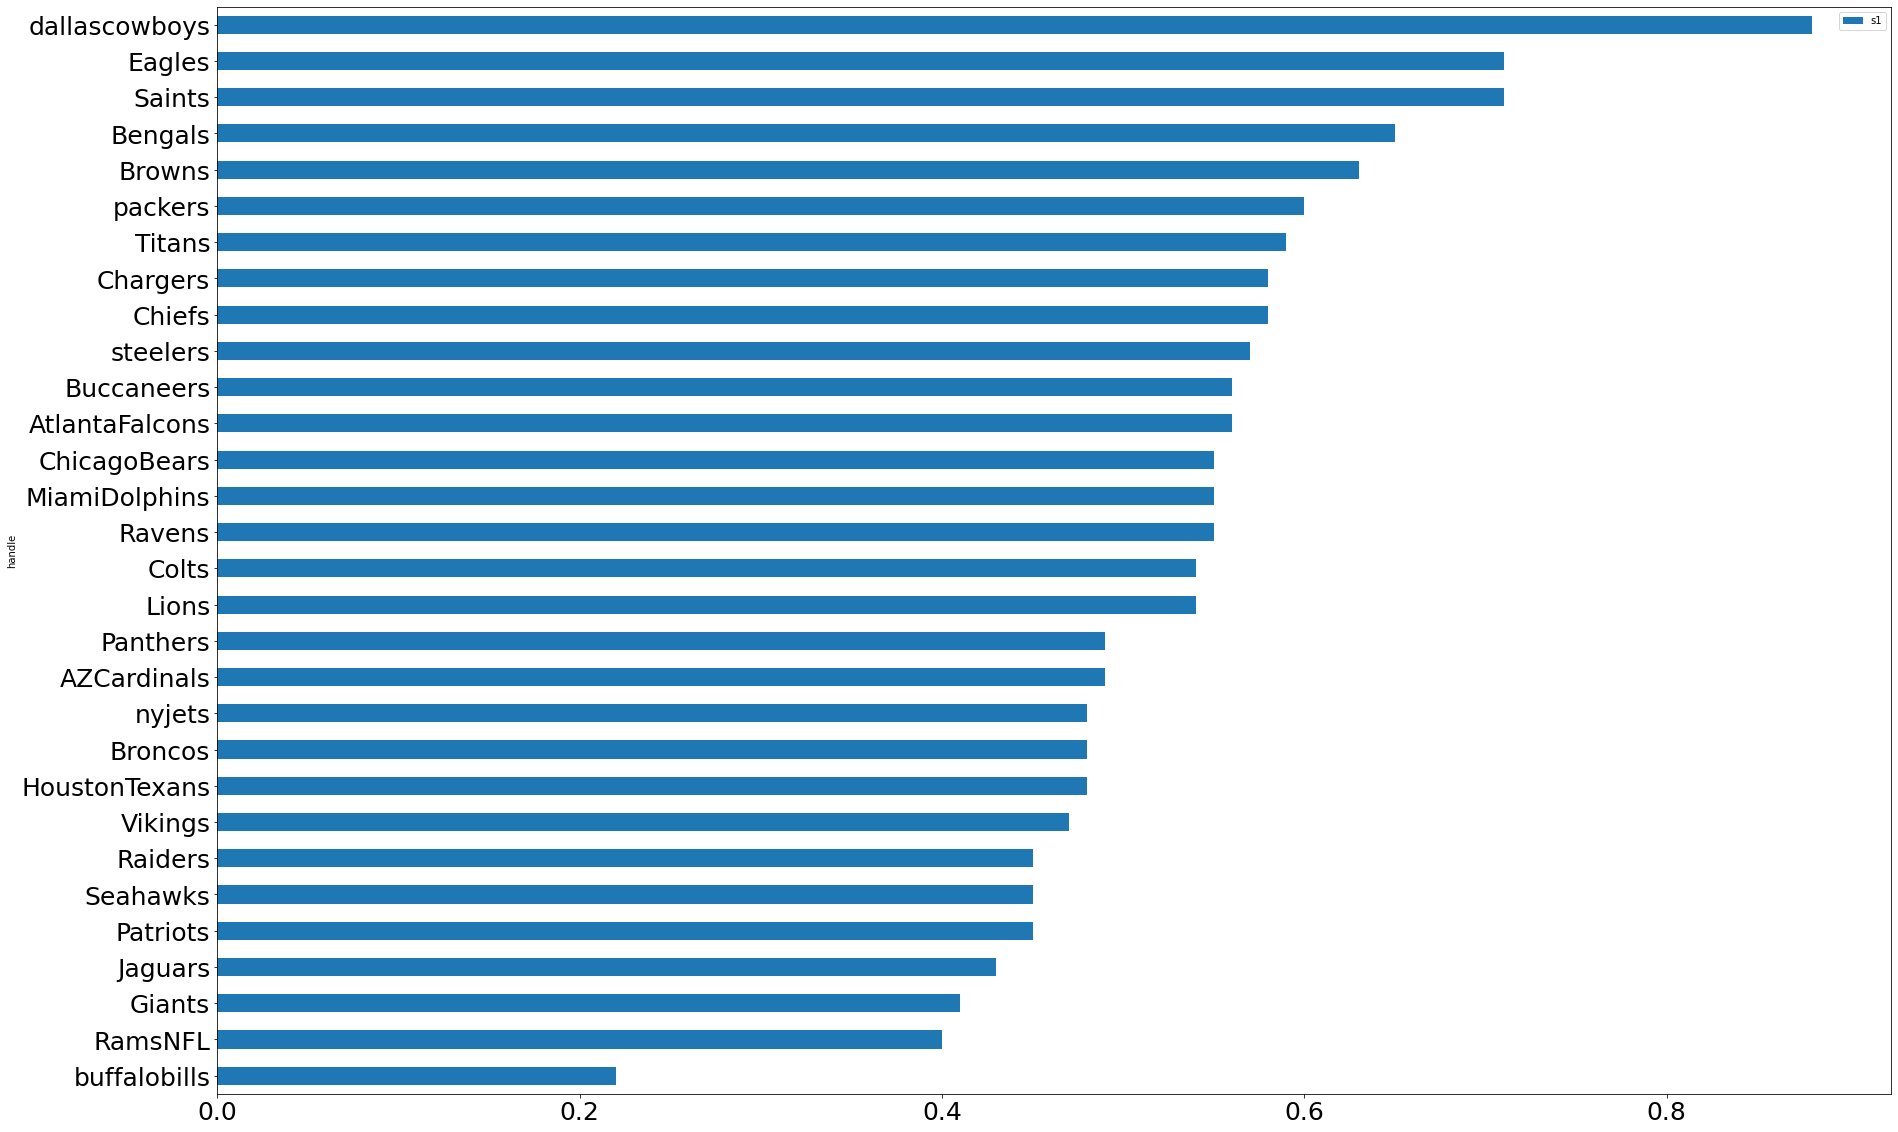

In [11]:
df.plot.barh(y='s1',x='handle',figsize=(30,20),fontsize=25)